<a href="https://colab.research.google.com/github/DurgaPrasad-R/FML/blob/main/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
# import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Load data
df = pd.read_csv('/content/drive/MyDrive/Datasets/AirPassengers.csv')

In [13]:
# No. of rows and columns of data
df.shape

(144, 2)

In [14]:
# Head of the data
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [15]:
# Information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [16]:
# Check if any null values
df.isna().sum()

Month          0
#Passengers    0
dtype: int64

In [17]:
# parse object datatype to datetime type
df['Month'] = pd.to_datetime(df['Month'],infer_datetime_format=True)

In [18]:
# Setting as index
indexed_data = df.set_index(['Month'])

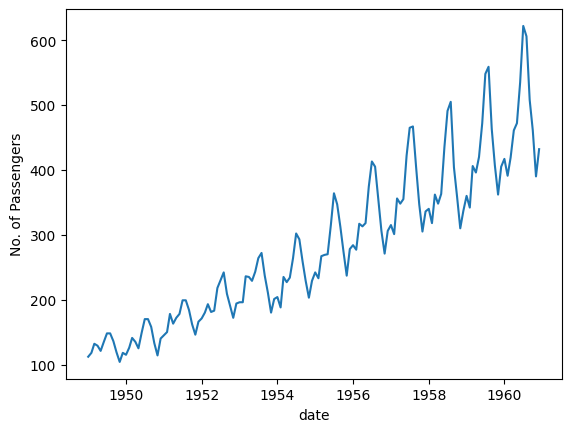

In [19]:
# Plotting a graph
plt.xlabel("date")
plt.ylabel("No. of Passengers")
plt.plot(indexed_data)

In [24]:
#Determining Rolling statistics for stationarity
rolmean = indexed_data.rolling(window=12).mean()
rolstd = indexed_data.rolling(window=12).std()
print(rolmean, rolstd)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01   463.333333
1960-09-01   467.083333
1960-10-01   471.583333
1960-11-01   473.916667
1960-12-01   476.166667

[144 rows x 1 columns]             #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01    83.630500
1960-09-01    84.617276
1960-10-01    82.541954
1960-11-01    79.502382
1960-12-01    77.737125

[144 rows x 1 columns]


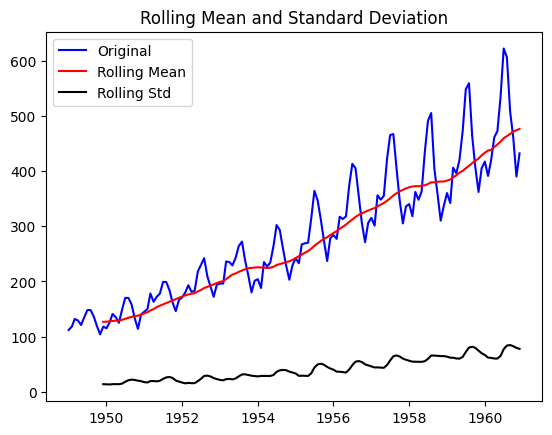

In [25]:
#plot rolling statistics
orig = plt.plot(indexed_data, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label="Rolling Std")
plt.legend(loc='best')
plt.title("Rolling Mean and Standard Deviation")
plt.show()

As you can see, the rolling mean and rolling standard deviation increase with time. Therefore, we can conclude that the time series is not stationary.

In [28]:
# Performing ADF Test
from statsmodels.tsa.stattools import adfuller
result = adfuller(indexed_data['#Passengers'])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: 0.8153688792060498
p-value: 0.991880243437641
Critical Values:
	1%: -3.4816817173418295
	5%: -2.8840418343195267
	10%: -2.578770059171598


The ADF Statistic is far from the critical values and the p-value is greater than the threshold (0.05). Thus, we can conclude that the time series is not stationary.

Taking the log of the dependent variable is as simple way of lowering the rate at which rolling mean increases.

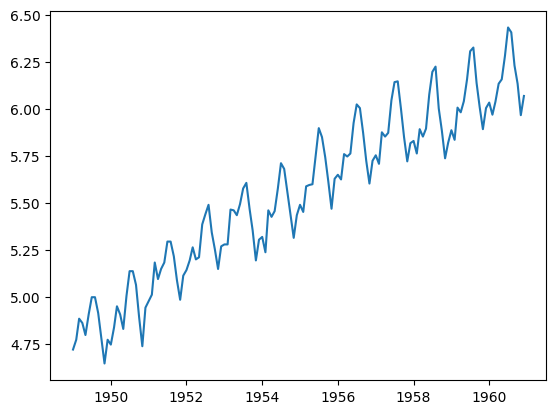

In [29]:
df_log = np.log(indexed_data)
plt.plot(df_log)

There are multiple transformations that we can apply to a time series to render it stationary. For instance, we subtract the rolling mean.

In [31]:
rolling_mean = df_log.rolling(window=12).mean()
df_log_minus_mean = df_log - rolling_mean
df_log_minus_mean.dropna(inplace=True)

In [32]:
#Determining Rolling statistics for stationarity
rolmean = df_log_minus_mean.rolling(window=12).mean()
rolstd = df_log_minus_mean.rolling(window=12).std()
print(rolmean, rolstd)

            #Passengers
Month                  
1949-12-01          NaN
1950-01-01          NaN
1950-02-01          NaN
1950-03-01          NaN
1950-04-01          NaN
...                 ...
1960-08-01     0.053566
1960-09-01     0.051081
1960-10-01     0.051255
1960-11-01     0.047814
1960-12-01     0.044372

[133 rows x 1 columns]             #Passengers
Month                  
1949-12-01          NaN
1950-01-01          NaN
1950-02-01          NaN
1950-03-01          NaN
1950-04-01          NaN
...                 ...
1960-08-01     0.145302
1960-09-01     0.144162
1960-10-01     0.144082
1960-11-01     0.149491
1960-12-01     0.152260

[133 rows x 1 columns]


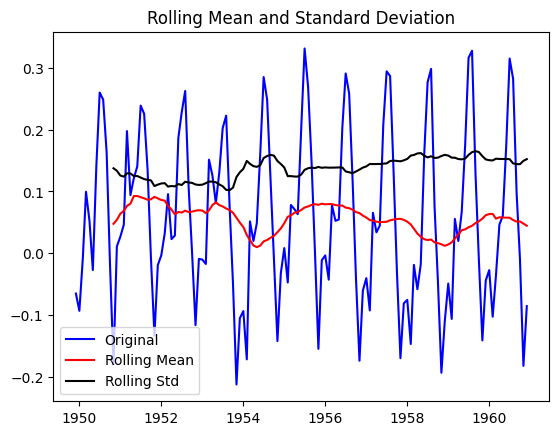

In [33]:
#plot rolling statistics
orig = plt.plot(df_log_minus_mean, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label="Rolling Std")
plt.legend(loc='best')
plt.title("Rolling Mean and Standard Deviation")
plt.show()

In [34]:
# Performing ADF Test
from statsmodels.tsa.stattools import adfuller
result = adfuller(df_log_minus_mean['#Passengers'])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -3.1629079913008833
p-value: 0.022234630001242206
Critical Values:
	1%: -3.4865346059036564
	5%: -2.8861509858476264
	10%: -2.579896092790057


As we can see, after subtracting the mean, the rolling mean and standard deviation are approximately horizontal. The p-value is below the threshold of 0.05 and the ADF Statistic is close to the critical values. Therefore, the time series is stationary.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


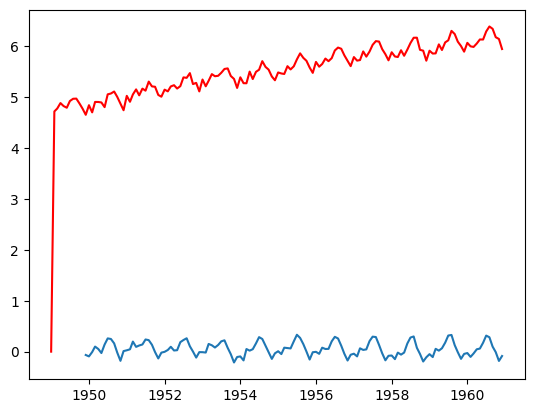

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as smapi

decomposition = seasonal_decompose(df_log) 
model = smapi.tsa.arima.ARIMA(df_log, order=(2,1,2))
results = model.fit()
plt.plot(df_log_minus_mean)
plt.plot(results.fittedvalues, color='red')

<Axes: xlabel='Month'>

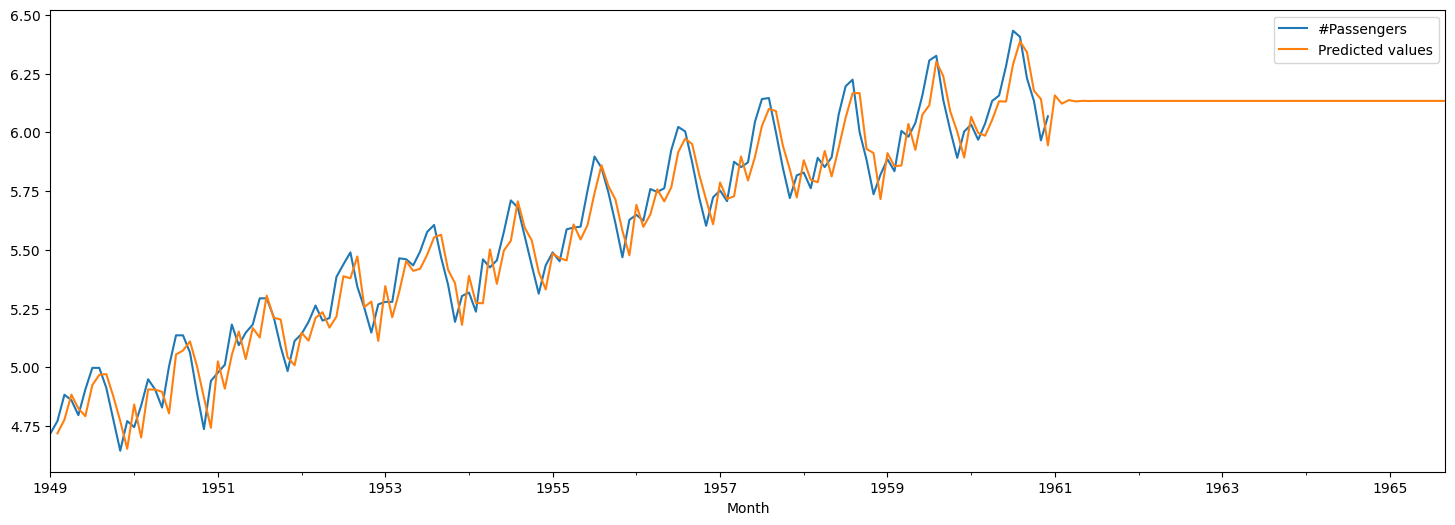

In [36]:
# Predictions for one-year against the test set
predictions = results.predict(1, 200,
                             typ = 'linear')

  
# plot predictions and actual values

df_log.plot(legend = True)
predictions.plot(figsize = (18, 6), legend = True, label = "Predicted values")